<a href="https://colab.research.google.com/github/MilindiSenevirathne/COVID-19_Test/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import pandas as pd
from geopy.geocoders import Nominatim
import folium
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns

#Dengue Dataset

In [45]:
dengue_df = pd.read_csv('/content/sample_data/dengue data sri lanka.csv', sep = r'\s*,\s*', engine = 'python')
dengue_df.head()

,year,week,start.date,end.date,District,cases,Latitude,Longitude
0,2006,52,12/23/2006,12/29/2006,Colombo,71,NaN,NaN
1,2006,52,12/23/2006,12/29/2006,Gampaha,12,NaN,NaN
2,2006,52,12/23/2006,12/29/2006,Kalutara,12,NaN,NaN
3,2006,52,12/23/2006,12/29/2006,Kandy,20,NaN,NaN
4,2006,52,12/23/2006,12/29/2006,Matale,4,NaN,NaN


In [46]:
dengue_df.isnull().sum()

year              0
week              0
start.date        0
end.date          0
District          0
cases             0
Latitude      21960
Longitude     21960
dtype: int64

In [47]:
districts = pd.read_csv('/content/sample_data/sl_locations.csv')
districts.head()

,District,Latitude,Longitude
0,Colombo,6.927079,79.861243
1,Gampaha,7.084048,80.009831
2,Kalutara,6.585395,79.960740
3,Kandy,7.290572,80.633726
4,Matale,7.467465,80.623416


In [48]:
dengue_df = pd.merge(dengue_df, districts, on='District', how='left', suffixes=('', '_new'))
dengue_df['Latitude'] = dengue_df['Latitude'].fillna(dengue_df['Latitude_new'])
dengue_df['Longitude'] = dengue_df['Longitude'].fillna(dengue_df['Longitude_new'])
dengue_df.drop(['Latitude_new', 'Longitude_new'], axis=1, inplace=True)
dengue_df.head()

,year,week,start.date,end.date,District,cases,Latitude,Longitude
0,2006,52,12/23/2006,12/29/2006,Colombo,71,6.927079,79.861243
1,2006,52,12/23/2006,12/29/2006,Gampaha,12,7.084048,80.009831
2,2006,52,12/23/2006,12/29/2006,Kalutara,12,6.585395,79.960740
3,2006,52,12/23/2006,12/29/2006,Kandy,20,7.290572,80.633726
4,2006,52,12/23/2006,12/29/2006,Matale,4,7.467465,80.623416


In [49]:
dengue_df = gpd.GeoDataFrame(dengue_df, geometry=gpd.points_from_xy(
    dengue_df.Longitude, dengue_df.Latitude
))

dengue_df.head()

,year,week,start.date,end.date,District,cases,Latitude,Longitude,geometry
0,2006,52,12/23/2006,12/29/2006,Colombo,71,6.927079,79.861243,POINT (79.86124 6.92708)
1,2006,52,12/23/2006,12/29/2006,Gampaha,12,7.084048,80.009831,POINT (80.00983 7.08405)
2,2006,52,12/23/2006,12/29/2006,Kalutara,12,6.585395,79.960740,POINT (79.96074 6.58539)
3,2006,52,12/23/2006,12/29/2006,Kandy,20,7.290572,80.633726,POINT (80.63373 7.29057)
4,2006,52,12/23/2006,12/29/2006,Matale,4,7.467465,80.623416,POINT (80.62342 7.46746)


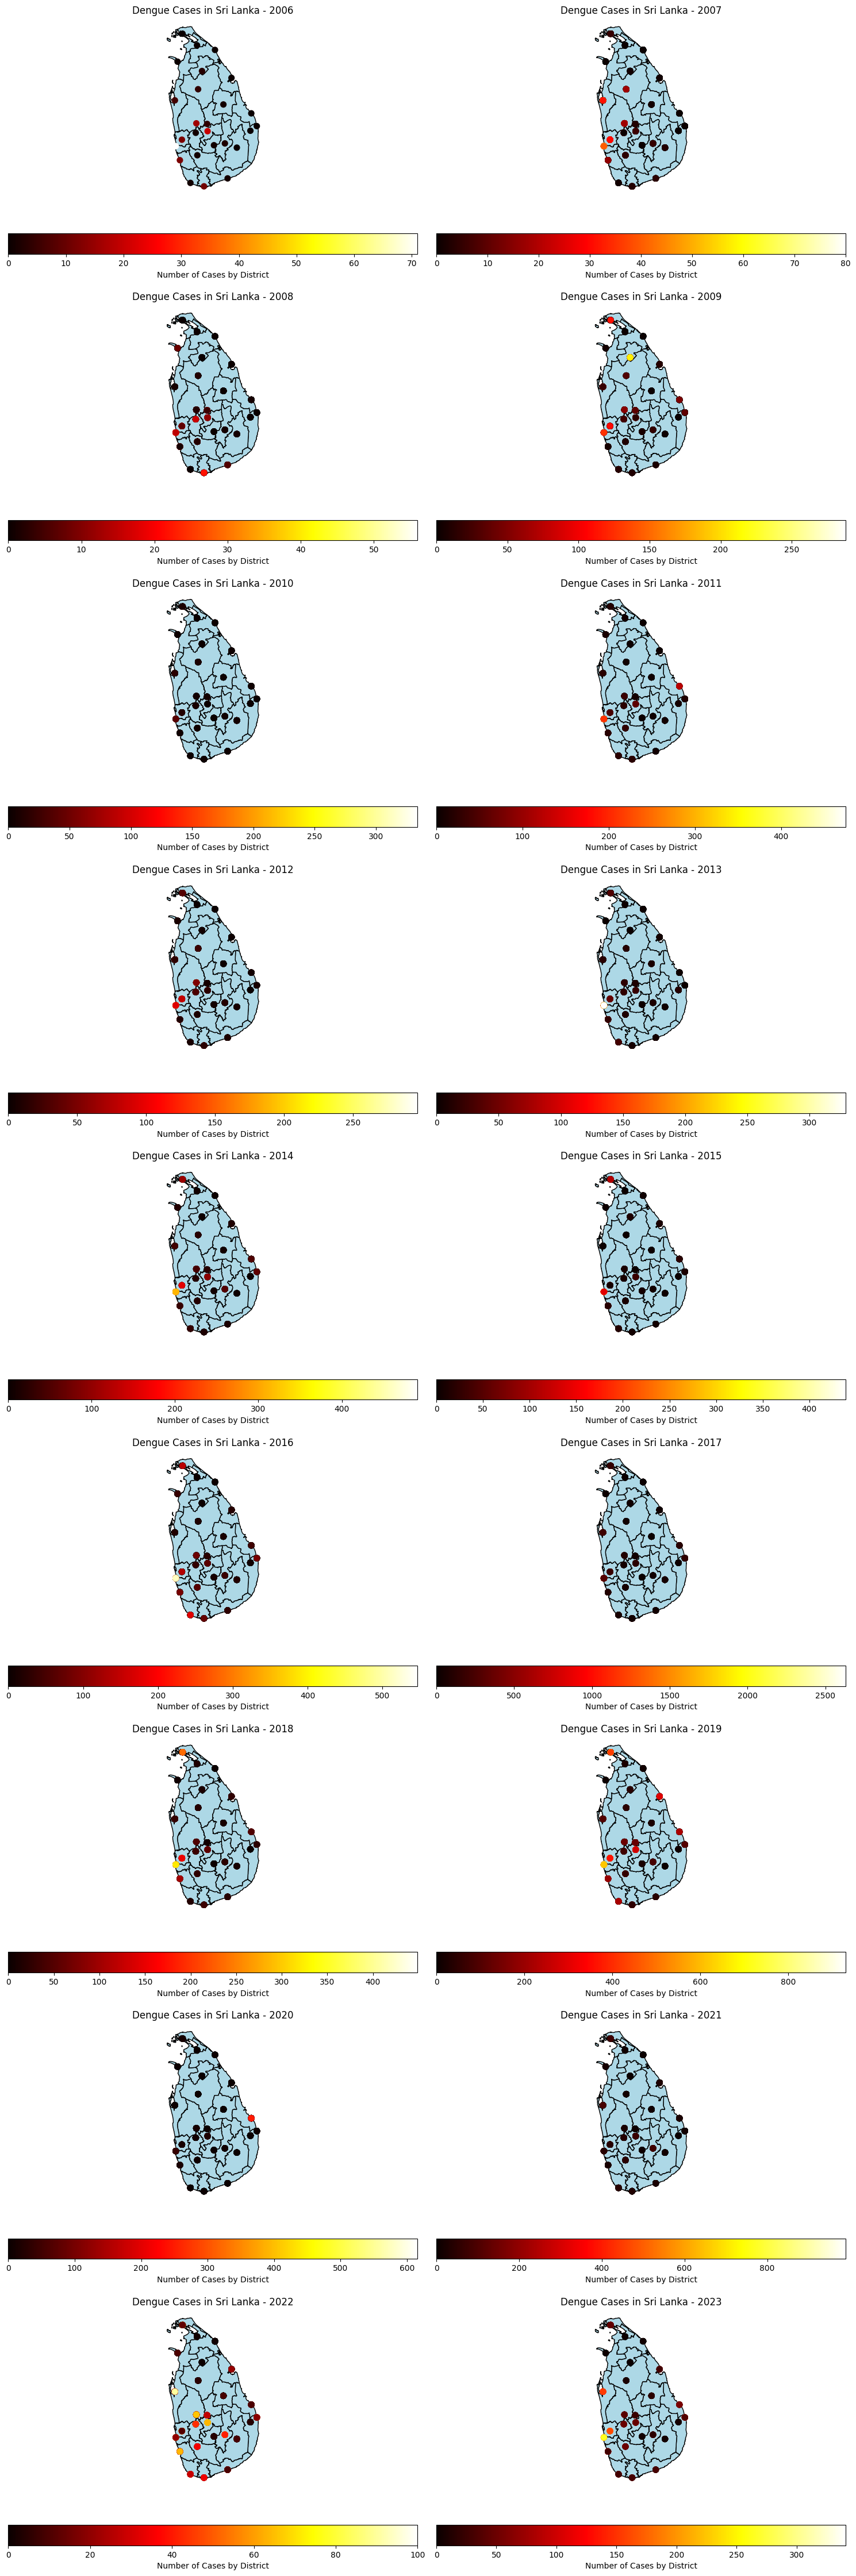

In [50]:
sri_lanka_map = gpd.read_file('/content/sample_data/sl.geojson')

dengue_df = gpd.GeoDataFrame(dengue_df, geometry='geometry')

unique_years = dengue_df['year'].unique()
num_years = len(unique_years)
num_cols = 2

num_rows = int(np.ceil(num_years / num_cols))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

for i, year in enumerate(sorted(unique_years)):
    row_index = i // num_cols
    col_index = i % num_cols

    ax = axs[row_index, col_index]

    sri_lanka_map.plot(ax=ax, color='lightblue', edgecolor='black')

    year_data = dengue_df[dengue_df['year'] == year]
    year_data.plot(ax=ax, column='cases', cmap='hot', markersize=50, legend=True,
                   legend_kwds={'label': "Number of Cases by District",
                                'orientation': "horizontal"})

    ax.set_title(f'Dengue Cases in Sri Lanka - {year}')
    ax.axis('off')

plt.tight_layout()
plt.show()

#COVID-19 Dataset

In [55]:
covid_df = pd.read_csv('/content/sample_data/worldometer_data.csv', sep = r'\s*,\s*', engine = 'python')
covid_df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,Latitude,Longitude
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,37.090240,-95.712891
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,-14.235004,-51.925280
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,20.593684,78.962880
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,61.524010,105.318756
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,-30.559482,22.937506


In [56]:
covid_df.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious              87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
Latitude              2
Longitude             2
dtype: int64

In [57]:
covid_df = covid_df.drop(['NewCases', 'NewDeaths', 'TotalDeaths', 'NewRecovered',
               'Serious', 'Deaths/1M pop', 'TotalTests','Tests/1M pop',
               'WHO Region', 'Continent'] ,axis=1)

covid_df.dropna(subset=['Latitude', 'Longitude','Population','TotalRecovered','ActiveCases','Tot Cases/1M pop'], inplace=True)
covid_df.isnull().sum()

Country/Region      0
Population          0
TotalCases          0
TotalRecovered      0
ActiveCases         0
Tot Cases/1M pop    0
Latitude            0
Longitude           0
dtype: int64

In [58]:
# Standardizing numerical data
scaler = StandardScaler()
covid_df[['Population', 'TotalCases', 'TotalRecovered', 'ActiveCases', 'Tot Cases/1M pop']] = scaler.fit_transform(
    covid_df[['Population', 'TotalCases', 'TotalRecovered', 'ActiveCases', 'Tot Cases/1M pop']])
covid_df.head()

,Country/Region,Population,TotalCases,TotalRecovered,ActiveCases,Tot Cases/1M pop,Latitude,Longitude
0,USA,2.844697,11.304914,9.784525,12.938463,2.306924,37.090240,-95.712891
1,Brazil,1.723987,6.467420,7.728252,4.246594,2.023732,-14.235004,-51.925280
2,India,12.777483,4.426490,5.122865,3.304705,-0.323430,20.593684,78.962880
3,Russia,1.092447,1.787657,2.397948,0.874122,0.540325,61.524010,105.318756
4,South Africa,0.273727,1.024247,1.274436,0.647509,1.132193,-30.559482,22.937506


<ipython-input-60-18a9f33b019b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = covid_df.corr(method='pearson')


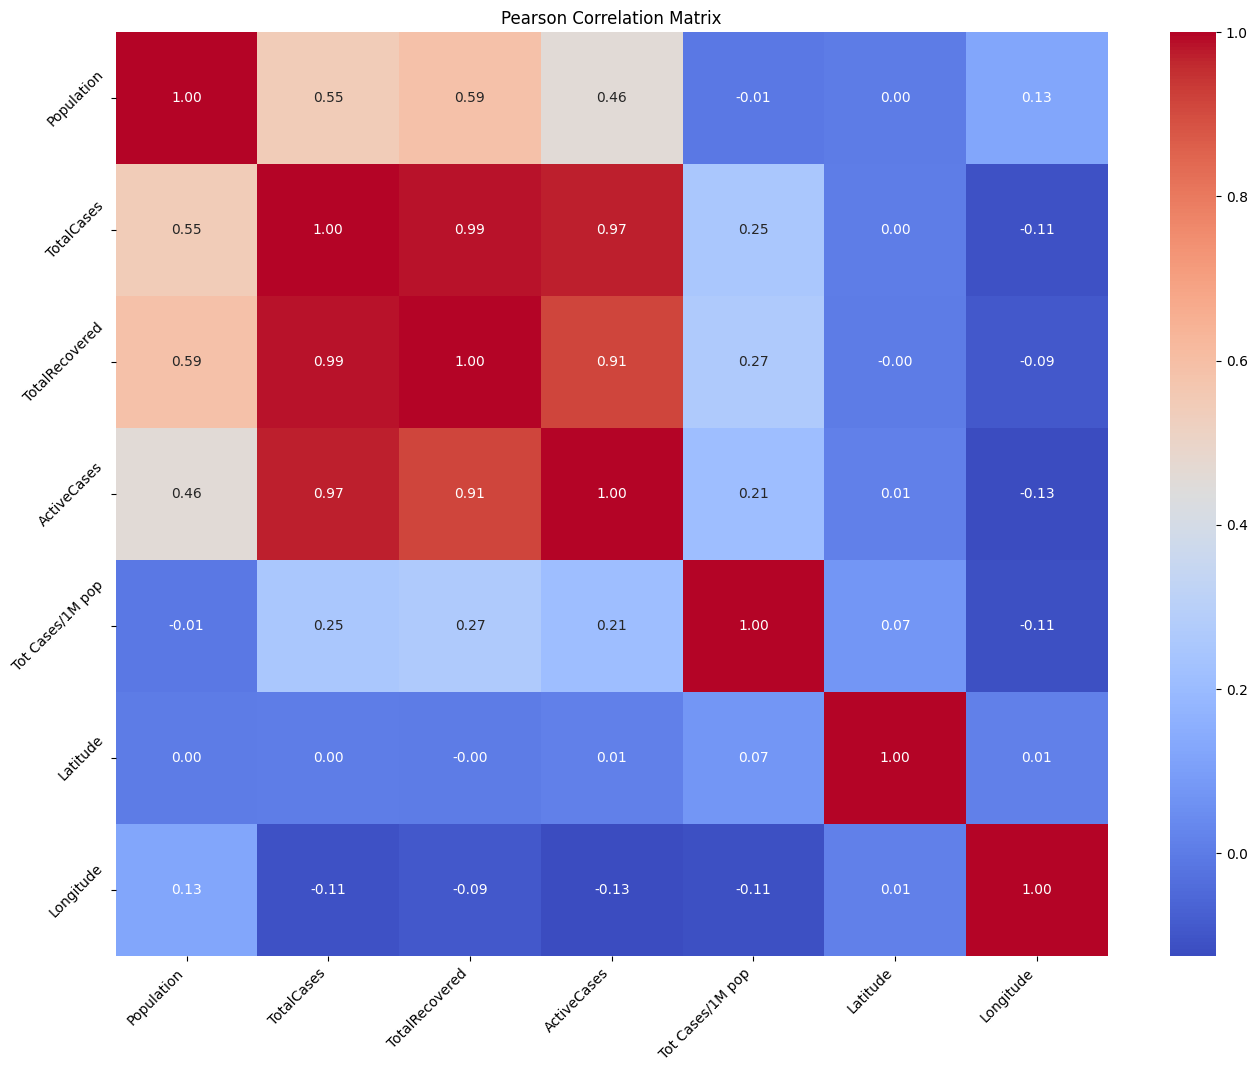

In [60]:
correlation_matrix = covid_df.corr(method='pearson')

plt.figure(figsize=(16, 12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)

plt.title('Pearson Correlation Matrix')
plt.show()

In [61]:
covid_df = covid_df.drop(['TotalRecovered', 'ActiveCases'] ,axis=1)

In [62]:
covid_df = gpd.GeoDataFrame(covid_df, geometry=gpd.points_from_xy(
    covid_df.Longitude, covid_df.Latitude
))

covid_df.head()

,Country/Region,Population,TotalCases,Tot Cases/1M pop,Latitude,Longitude,geometry
0,USA,2.844697,11.304914,2.306924,37.090240,-95.712891,POINT (-95.71289 37.09024)
1,Brazil,1.723987,6.467420,2.023732,-14.235004,-51.925280,POINT (-51.92528 -14.23500)
2,India,12.777483,4.426490,-0.323430,20.593684,78.962880,POINT (78.96288 20.59368)
3,Russia,1.092447,1.787657,0.540325,61.524010,105.318756,POINT (105.31876 61.52401)
4,South Africa,0.273727,1.024247,1.132193,-30.559482,22.937506,POINT (22.93751 -30.55948)
